<a href="https://colab.research.google.com/github/Alen-121/Alen-121/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
fraud_data = pd.read_csv('/content/Fraud.csv')

In [3]:
''' First checking the data'''
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.0,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.0,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.0,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.0,C299715257,156646.32,491301.04,0.0,0.0
42270,9,CASH_OUT,271441.28,C2034845877,0.0,0.0,C71127,NaN,NaN,NaN,NaN


In [5]:
# fraud_data.to_string()

In [6]:
fraud_data.info()#checking the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [7]:
print(fraud_data.describe())#checking necessary description

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  42271.000000  4.227100e+04   4.227100e+04    4.227100e+04   
mean       7.171087  1.490108e+05   7.727734e+05    7.874065e+05   
std        2.118037  3.145005e+05   2.284003e+06    2.321941e+06   
min        1.000000  1.770000e+00   0.000000e+00    0.000000e+00   
25%        7.000000  7.031875e+03   0.000000e+00    0.000000e+00   
50%        8.000000  2.751283e+04   1.856733e+04    3.339900e+02   
75%        8.000000  1.794321e+05   1.421965e+05    1.500335e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    4.227000e+04    4.227000e+04  42270.000000         42270.0  
mean     8.450982e+05    1.158405e+06      0.002224             0.0  
std      2.466743e+06    2.960508e+06      0.047105             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [8]:
fraud_data.isnull().sum() # detect missing values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [9]:
fraud_data.duplicated().sum() #detect duplicate values

0

In [10]:
fraud_data.isna().sum() #detect missing values , Nan Values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [11]:
fraud_data.dropna(inplace=True)#removing Nan , missing values

In [12]:
fraud_data.shape

(42270, 11)

In [13]:
# s =fraud_data.select_dtypes(include='number').columns

In [14]:
fraud_data.dtypes #checking the data types

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [15]:
fraud_data.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
print(fraud_data['isFraud'].value_counts())

isFraud
0.0    42176
1.0       94
Name: count, dtype: int64


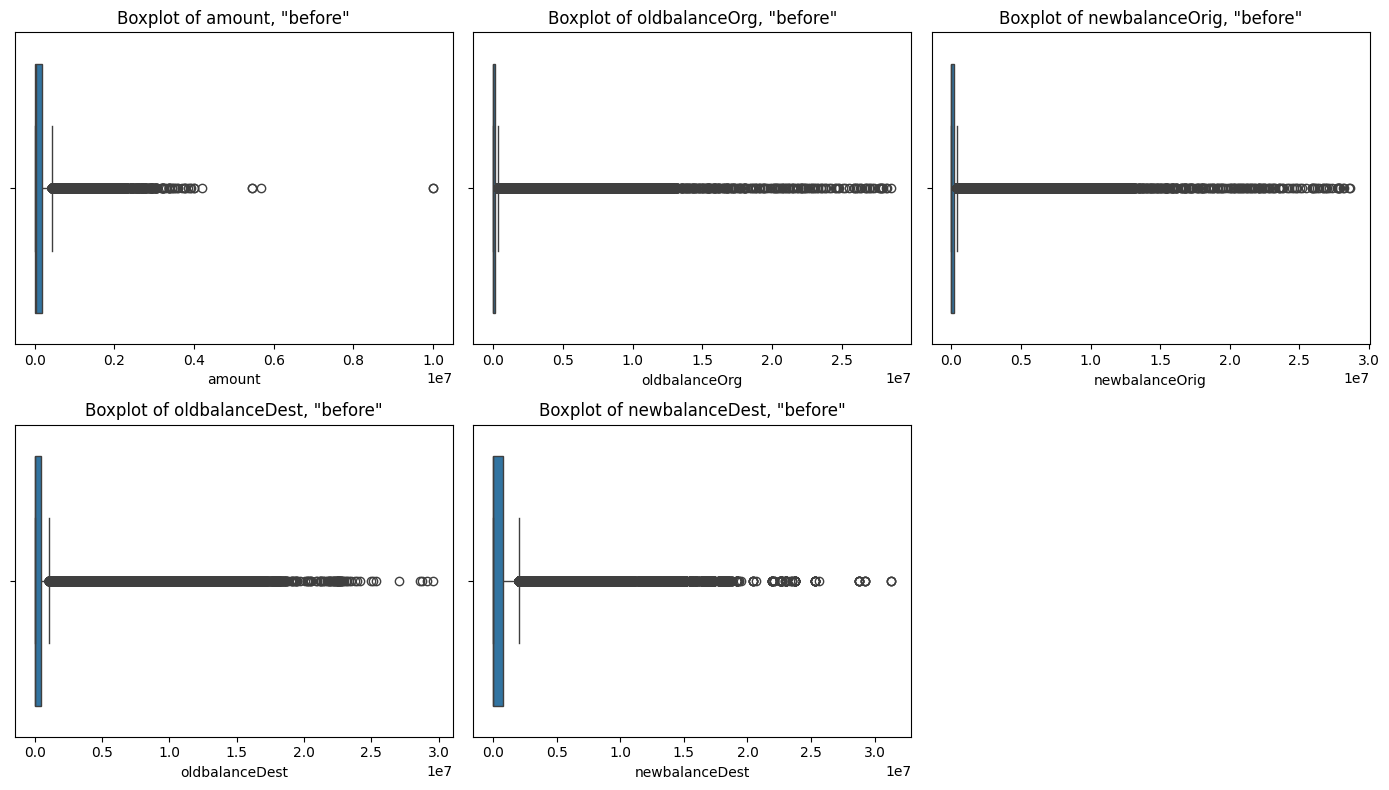

In [17]:
#box plot for finding  any outliers
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
# Setting up the plot
plt.figure(figsize=(14, 8))

# Plotting each numeric column as a boxplot
for i, column in enumerate(numeric_columns, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(x=fraud_data[column])
  plt.title(f'Boxplot of {column}, "before"')

# Adjust the layout
plt.tight_layout()
plt.show()

In [18]:
'''As we can see from the boxplot the  outliers and multi-collinearity are present in the data. We can either consider it or try to remove it.Here I am going to use Z-score method to remove the outliers.
We will find a upperlimit and a lower limit , and only going to keep the values between these limits and that process is called trimming.'''

'As we can see from the boxplot the  outliers and multi-collinearity are present in the data. We can either consider it or try to remove it.Here I am going to use Z-score method to remove the outliers.\nWe will find a upperlimit and a lower limit , and only going to keep the values between these limits and that process is called trimming.'

In [19]:
upper_limit_amount = fraud_data['amount'].mean() + 3*fraud_data['amount'].std()
lower_limit_amount = fraud_data['amount'].mean() - 3*fraud_data['amount'].std()
print('upper limit : ',upper_limit_amount)
print('lower limit : ', lower_limit_amount)

upper limit :  1092518.7165857821
lower limit :  -794502.9250896855


In [20]:

upper_limit_oldbalanceOrg = fraud_data['oldbalanceOrg'].mean() + 3*fraud_data['oldbalanceOrg'].std()
lower_limit_oldbalanceOrg = fraud_data['oldbalanceOrg'].mean() - 3*fraud_data['oldbalanceOrg'].std()
print('upper limit : ',upper_limit_oldbalanceOrg)
print('lower limit : ', lower_limit_oldbalanceOrg)

upper limit :  7624873.140546907
lower limit :  -6079289.764998764


In [21]:
upper_limit_newbalanceOrig = fraud_data['newbalanceOrig'].mean() + 3*fraud_data['newbalanceOrig'].std()
lower_limit_newbalanceOrig = fraud_data['newbalanceOrig'].mean() - 3*fraud_data['newbalanceOrig'].std()
print('upper limit : ',upper_limit_newbalanceOrig)
print('lower limit : ', lower_limit_newbalanceOrig)

upper limit :  7753320.925421377
lower limit :  -6178470.654742881


In [22]:
upper_limit_oldbalanceDest = fraud_data['oldbalanceDest'].mean() + 3*fraud_data['oldbalanceDest'].std()
lower_limit_oldbalanceDest = fraud_data['oldbalanceDest'].mean() - 3*fraud_data['oldbalanceDest'].std()
print('upper limit : ',upper_limit_oldbalanceDest)
print('lower limit : ', lower_limit_oldbalanceDest)

upper limit :  8245326.117723481
lower limit :  -6555129.659844133


In [23]:
upper_limit_newbalanceDest = fraud_data['newbalanceDest'].mean() + 3*fraud_data['newbalanceDest'].std()
lower_limit_newbalanceDest = fraud_data['oldbalanceDest'].mean() - 3*fraud_data['newbalanceDest'].std()
print('upper limit : ',upper_limit_newbalanceDest)
print('lower limit : ', lower_limit_newbalanceDest)

upper limit :  10039927.780189052
lower limit :  -8036425.03977552


In [24]:
#find the outliers


fraud_data.loc[(fraud_data['amount']> upper_limit_amount )|(fraud_data['amount']<lower_limit_amount)]
fraud_data.loc[(fraud_data['oldbalanceOrg']> upper_limit_oldbalanceOrg )|(fraud_data['oldbalanceOrg']<lower_limit_oldbalanceOrg)]
fraud_data.loc[(fraud_data['newbalanceOrig']> upper_limit_newbalanceOrig )|(fraud_data['newbalanceOrig']<lower_limit_newbalanceOrig)]
fraud_data.loc[(fraud_data['oldbalanceDest']> upper_limit_oldbalanceDest )|(fraud_data['oldbalanceDest']<lower_limit_oldbalanceDest)]
fraud_data.loc[(fraud_data['newbalanceDest']> upper_limit_newbalanceDest )|(fraud_data['newbalanceDest']<lower_limit_newbalanceDest)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84,1,TRANSFER,379856.23,C1449772539,0.00,0.00,C1590550415,900180.00,19169204.93,0.0,0.0
88,1,TRANSFER,761507.39,C412788346,0.00,0.00,C1590550415,1280036.23,19169204.93,0.0,0.0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.00,C1590550415,2041543.62,19169204.93,0.0,0.0
94,1,TRANSFER,1724887.05,C1495608502,0.00,0.00,C1590550415,3470595.10,19169204.93,0.0,0.0
96,1,TRANSFER,581294.26,C843299092,0.00,0.00,C1590550415,5195482.15,19169204.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
41569,9,TRANSFER,14047.85,C249276733,0.00,0.00,C481402298,10050175.88,10064223.73,0.0,0.0
41623,9,CASH_OUT,224045.04,C307557044,0.00,0.00,C155706298,13839520.24,14242272.20,0.0,0.0
41844,9,CASH_OUT,70434.72,C1314332271,27169.00,0.00,C1579862569,36304.00,12657174.33,0.0,0.0
42138,9,CASH_OUT,150447.44,C1822042893,1036816.42,886368.98,C1590550415,21967035.23,22117482.67,0.0,0.0


In [25]:
#trimming the data


filtered_fraud_data = fraud_data.loc[
    (fraud_data['amount'] < upper_limit_amount) & (fraud_data['amount'] > lower_limit_amount) &
    (fraud_data['oldbalanceOrg'] < upper_limit_oldbalanceOrg) & (fraud_data['oldbalanceOrg'] > lower_limit_oldbalanceOrg) &
    (fraud_data['newbalanceOrig'] < upper_limit_newbalanceOrig) & (fraud_data['newbalanceOrig'] > lower_limit_newbalanceOrig) &
    (fraud_data['oldbalanceDest'] < upper_limit_oldbalanceDest) & (fraud_data['oldbalanceDest'] > lower_limit_oldbalanceDest) &
    (fraud_data['newbalanceDest'] < upper_limit_newbalanceDest) & (fraud_data['newbalanceDest'] > lower_limit_newbalanceDest)
]

print('Filtered data size:', len(filtered_fraud_data))
print('Original fraud data size:', len(fraud_data))

Filtered data size: 38981
Original fraud data size: 42270


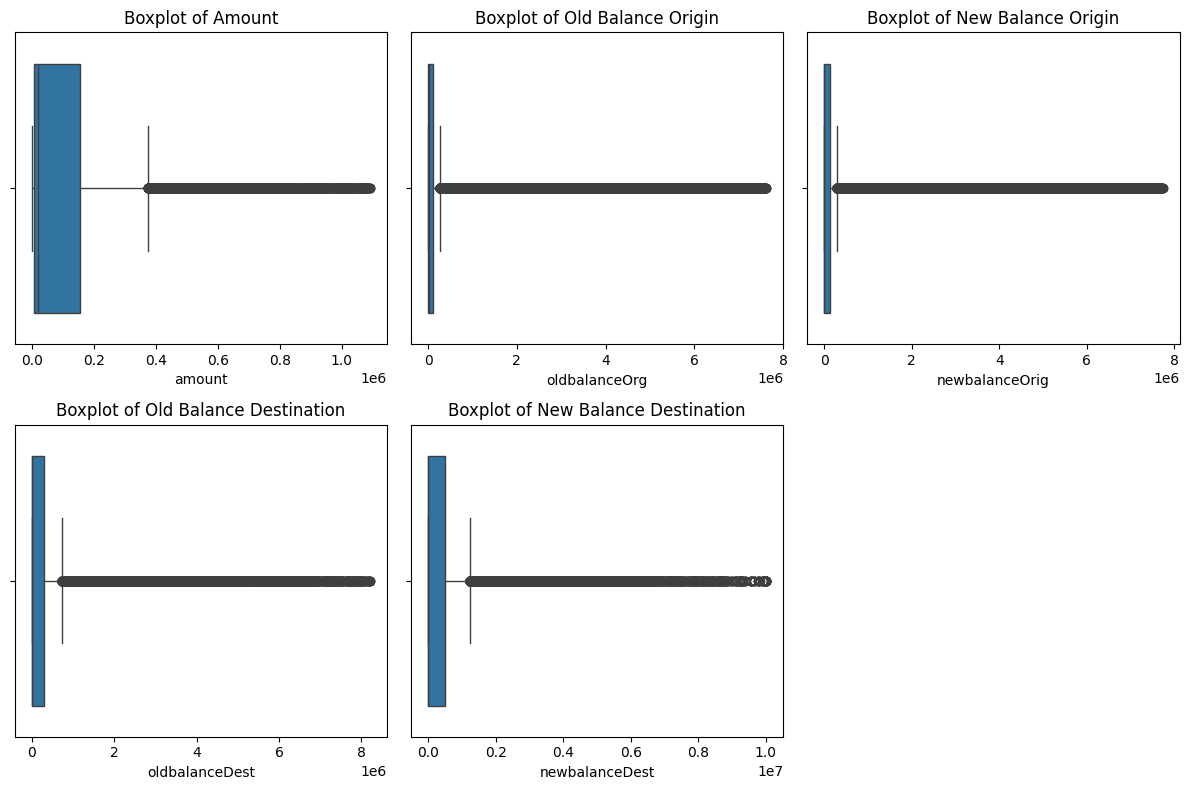

In [26]:
plt.figure(figsize=(12, 8))

# Plotting boxplots for key features in the filtered fraud data
plt.subplot(2, 3, 1)
sns.boxplot(x='amount', data=filtered_fraud_data)
plt.title('Boxplot of Amount')

plt.subplot(2, 3, 2)
sns.boxplot(x='oldbalanceOrg', data=filtered_fraud_data)
plt.title('Boxplot of Old Balance Origin')

plt.subplot(2, 3, 3)
sns.boxplot(x='newbalanceOrig', data=filtered_fraud_data)
plt.title('Boxplot of New Balance Origin')

plt.subplot(2, 3, 4)
sns.boxplot(x='oldbalanceDest', data=filtered_fraud_data)
plt.title('Boxplot of Old Balance Destination')

plt.subplot(2, 3, 5)
sns.boxplot(x='newbalanceDest', data=filtered_fraud_data)
plt.title('Boxplot of New Balance Destination')

plt.tight_layout()
plt.show()

In [27]:
for index, row in filtered_fraud_data.iterrows():
    if (row['amount'] == row['oldbalanceOrg']) and (row['newbalanceDest'] == 0):
        filtered_fraud_data.at[index, 'isFraud'] = 1  # Mark as fraud
    elif (row['oldbalanceDest'] == 0) and (row['newbalanceDest'] == row['amount']):
        filtered_fraud_data.at[index, 'isFraud'] = 1  # Mark as fraud
    elif (row['amount'] > 200000) and (row['isFlaggedFraud'] == 1):
        filtered_fraud_data.at[index, 'isFraud'] = 1  # Mark as fraud
    else:
        filtered_fraud_data.at[index, 'isFraud'] = 0  # Not fraud

In [28]:
print(filtered_fraud_data['isFraud'].value_counts())
print(filtered_fraud_data.shape)

isFraud
0.0    38412
1.0      569
Name: count, dtype: int64
(38981, 11)


In [29]:
filtered_fraud_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [30]:
#multi-collinearity
y = filtered_fraud_data['isFraud']
x =filtered_fraud_data[['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()#ordinary least square


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isFraud   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.49e-131
Time:                        18:52:45   Log-Likelihood:                 27669.
No. Observations:               38981   AIC:                        -5.533e+04
Df Residuals:                   38975   BIC:                        -5.528e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0124      0.001     16.506      0.000       0.011       0.014
amount          7.556e-08   4.19e-09     18.016      0.000    6.73e-08    8.38e-08
oldbalanceOrg   1.088e-07   7.12e-09     15.292      0.000    9.49e-08    1.23e-07
newbalanceOrig  -1.09e-07   6.93e-09    -15.712      0.000   -1.23e-07   -9.54e-08
oldbalanceDest -8.555e-10   1.18e-09     -0.727      0.467   -3.16e-09    1.45e-09
newbalanceDest -6.309e-09   9.12e-10     -6.916      0.000    -8.1e-09   -4.52e-09
==============================================================================
Omnibus:                    51757.915   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6569469.658
Skew:                           7.906   Prob(JB):                         0.00
Kurtosis:                      64.601   Cond. No.                     2.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:

filtered_fraud_data.drop(['nameDest','nameOrig'],axis=1, inplace=True)
y = filtered_fraud_data['isFraud']
x = filtered_fraud_data.drop('isFraud',axis=1 )

<ipython-input-32-74ce6a71305b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fraud_data.drop(['nameDest','nameOrig'],axis=1, inplace=True)


In [33]:
state = np.random.RandomState(42)
x_outliers = state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
not_fraud = filtered_fraud_data[filtered_fraud_data['isFraud']==0]
can_be_fraud = filtered_fraud_data[filtered_fraud_data['isFraud']==1]
print(not_fraud.shape)
print(can_be_fraud.shape)

(38412, 9)
(569, 9)


In [34]:
#Encodeing
le = LabelEncoder()
x['type'] = le.fit_transform(x['type'])  # Encode 'type' column

smt = SMOTETomek(random_state=42)
x_res,y_res = smt.fit_resample(x,y)

In [35]:
print(x_res.shape)
print(y_res.shape)

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res ,test_size=0.3,random_state=42)


(76788, 8)
(76788,)


In [36]:
#normalization
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [37]:
#model creation
rc = RandomForestClassifier()
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [38]:

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9971784520553891
[[11511    64]
 [    1 11461]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11575
         1.0       0.99      1.00      1.00     11462

    accuracy                           1.00     23037
   macro avg       1.00      1.00      1.00     23037
weighted avg       1.00      1.00      1.00     23037



In [39]:
"""
  Question 2 :Describe your fraud detection model in elaboration.
  Answer :    The fraud detection model uses machine learning algorithm like Random Forest  trained on features such as transaction type, amount, balance changes, and flagged transactions.
   It handles class imbalance using technique SMOTETomek and focuses on accuary score ,recall, f1 score toeffectively identify fraud while minimizing false positives.
"""

'\n  Question 2 :Describe your fraud detection model in elaboration.\n  Answer :    The fraud detection model uses machine learning algorithm like Random Forest  trained on features such as transaction type, amount, balance changes, and flagged transactions.\n   It handles class imbalance using technique SMOTETomek and focuses on accuary score and f1 score toeffectively identify fraud while minimizing false positives.\n'

In [40]:
""" Question 3 : How did you select variables to be included in the model?
    Answer : Since in the given data 'isFraud' is very less , I have used suspicious transaction like
    If the transaction amount equals the old balance 'oldbalanceOrg', and the new balance 'newbalanceOrig' goes to zero, it could be a sign of an fraud transction.
    If the recipient 'nameDest' has no initial balance 'oldbalanceDest = 0' and the new balance 'newbalanceDest' equals the transferred amount, this could indicate a suspicious transaction.
    If amount > 200,000 and isFlaggedFraud = 1, this transaction is flagged as potentially fraudulent or a fraud transcation
    By using this I have converted corresponding as 1 and others as 0  in 'isFraud'.
    These how I have selected variables to be included in the model
"""

" Question 3 : How did you select variables to be included in the model?\n    Answer : Since in the given data 'isFraud' is very less , I have used suspicious transaction like \n    If the transaction amount equals the old balance 'oldbalanceOrg', and the new balance 'newbalanceOrig' goes to zero, it could be a sign of an fraud transction.\n    If the recipient 'nameDest' has no initial balance 'oldbalanceDest = 0' and the new balance 'newbalanceDest' equals the transferred amount, this could indicate a suspicious transaction.\n    If amount > 200,000 and isFlaggedFraud = 1, this transaction is flagged as potentially fraudulent or a fraud transcation\n    By using this I have converted corresponding as 1 and others as 0  in 'isFraud'.\n    These how I have selected variables to be included in the model\n"

In [41]:
"""
  Question 4 : Demonstrate the performance of the model by using best set of tools
  Answer : I have used accuracy score . Since the data is imbalanced we sure about the accuarcy score.
        for that I have used confusion matrix and classification report , from the f1 score in the confusion report we can see that it rounds upto 1 which leads that it is a good model.
"""

'\n  Question 4 : Demonstrate the performance of the model by using best set of tools\n  Answer : I have used accuracy score . Since the data is imbalanced we sure about the accuarcy score.\n        for that I have used confusion matrix and classification report , from the f1 score in the confusion report we can see that it rounds upto 1 which leads that it is a good model.\n'

In [42]:
"""
  Question 5 : What are the key factors that predict fraudulent customer?
  Answer :  The key factors that predict fraudulent transactions include the transaction type (especially CASH-OUT and TRANSFER), significant changes in account balances ('oldbalanceOrg' vs 'newbalanceOrig' and 'oldbalanceDest' vs 'newbalanceDest'),
        and the transaction amount, particularly when it’s large relative to the initial balance.
        Additionally, transactions flagged by the system (isFlaggedFraud) and patterns of account draining are strong indicators of potential fraud.
"""

"\n  Question 5 : What are the key factors that predict fraudulent customer? \n  Answer :  The key factors that predict fraudulent transactions include the transaction type (especially CASH-OUT and TRANSFER), significant changes in account balances ('oldbalanceOrg' vs 'newbalanceOrig' and 'oldbalanceDest' vs 'newbalanceDest'), \n        and the transaction amount, particularly when it’s large relative to the initial balance. \n        Additionally, transactions flagged by the system (isFlaggedFraud) and patterns of account draining are strong indicators of potential fraud.\n"

In [43]:
"""
  Question 6 :Do these factors make sense? If yes, How? If not, How not?
  Answer : Yes, In the transaction type the  'CASH-OUT' and 'TRANSFER', are more prone to fraud because they involve moving money out of an account.
          Significant changes in balances, particularly if an account is drained or nearly emptied after a transaction, can be indicative of fraud.
           Large transactions relative to the account balance are suspicious because they may indicate that the account is being emptied.
"""

"\n  Question 6 :Do these factors make sense? If yes, How? If not, How not?\n  Answer : Yes, In the transaction type the  'CASH-OUT' and 'TRANSFER', are more prone to fraud because they involve moving money out of an account.\n          Significant changes in balances, particularly if an account is drained or nearly emptied after a transaction, can be indicative of fraud.\n           Large transactions relative to the account balance are suspicious because they may indicate that the account is being emptied.\n"

In [44]:
"""
  Question 7 : What kind of prevention should be adopted while company update its infrastructure?
  Answer : While updating the companies infrastructure ensure all software, including operating systems and applications, is up-to-date with the latest security patches.
           Implement strict access controls and biometrics permissions .Make sure to maintain a backup and recovery plans.
"""

'\n  Question 7 : What kind of prevention should be adopted while company update its infrastructure?\n  Answer : While updating the companies infrastructure ensure all software, including operating systems and applications, is up-to-date with the latest security patches.\n           Implement strict access controls and biometrics permissions .Make sure to maintain a backup and recovery plans. \n'

In [45]:
"""
  Question 8 : Assuming these actions have been implemented, how would you determine if they work?
  Answer : By running a checkup on the softwares , makeing sure to get incident response times, and the frequency of security breaches or alerts.
          Conduct regular audits and penetration testing to assess the validity of security measures.
"""

'\n  Question 8 : Assuming these actions have been implemented, how would you determine if they work?\n  Answer : By running a checkup on the softwares , makeing sure to get incident response times, and the frequency of security breaches or alerts. \n          Conduct regular audits and penetration testing to assess the validity of security measures. \n'